# Práctica 2.

## Semana 1. Vecinos próximos

Read data

In [1]:
import numpy as np
import pandas as pd
from statistics import mode 

filename="ConjuntosDatosP2/pima-indians-diabetes.data"
filename2="ConjuntosDatosP2/wdbc.data"
data = pd.read_csv(filename)
data1=pd.read_csv(filename2)

column_names=list(data.columns)
column_names1=list(data1.columns)
print("Column names:")
print(column_names)
print(column_names1)
class_name="Class"

class_list=data[class_name].values
class_list1=data1[class_name].values

Column names:
['Pregs', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class']
['Atributo1', 'Atributo2', 'Atributo3', 'Atributo4', 'Atributo5', 'Atributo6', 'Atributo7', 'Atributo8', 'Atributo9', 'Atributo10', 'Atributo11', 'Atributo12', 'Atributo13', 'Atributo14', 'Atributo15', 'Atributo16', 'Atributo17', 'Atributo18', 'Atributo19', 'Atributo20', 'Atributo21', 'Atributo22', 'Atributo23', 'Atributo24', 'Atributo25', 'Atributo26', 'Atributo27', 'Atributo28', 'Atributo29', 'Atributo30', 'Class']


In [2]:
import numpy as np
import pandas as pd
from statistics import mode 
class ClasificadorVecinosProximos:
    def __init__(self,train_set, classes):
        self.train=train_set.copy(deep=True)
        self.classes=classes.values
        self.class_names=np.unique(self.classes)
        self.normalize_done=False
        self.calcularMediasDesv()
        
    def calcularMediasDesv(self):
        self.mean=self.train.mean(axis=0)
        self.std=self.train.std(axis=0)
    def normalizarDato(self, dato):
        x=(dato-self.mean.values)/self.std.values
        return(x)
    def normalizarDatos(self):
        if not self.normalize_done:
            for att in self.train.columns:
                self.train[att]=(self.train[att]-self.mean[att])/self.std[att]
                self.normalize_done=True
        return(self.train)

    def euclidian_distance(self,dato):
        i=0
        square_dist=0
        for att in self.train.columns:
            square_dist=square_dist+(self.train[att].values-dato[i])**2
            i+=1
        square_dist=square_dist**0.5
        return(square_dist)
    def manhatten_distance(self,dato):
        i=0
        dist=0
        for att in self.train.columns:
            dist=dist+(self.train[att].values-dato[i])
            i+=1
        return(abs(dist))
    def mahalanobis_distance(self,dato): 
        X=self.train.values
        if self.normalize_done:
            mu=np.zeros(len(dato))
        else:
            mu=self.mean
        cov=np.cov(np.transpose(X-mu))
        diff=dato - mu
        inv=np.linalg.inv(cov)
        left=np.dot(diff,inv)
        dist=np.dot(left,np.transpose(diff))
        return(dist)
    def kneigbour_class(self, x, k, dist_type):
        if dist_type=="manhatten":
            dist=self.manhatten_distance(x)
        elif dist_type=="mahalanobis":
            dist=self.mahalanobis_distance(x)
        else:
            dist=self.euclidian_distance(x)
        idx = np.argpartition(dist, k)
        idx=idx[0:k]
        values, counts = np.unique(self.classes[idx], return_counts=True)
        self.prob=np.max(counts)/k
        return mode(self.classes[idx])
    def kneigbour_class_prob(self, x, k, dist_type):
        self.kneigbour_class(x, k, dist_type)
        return self.prob

In [3]:
import EstrategiaParticionado

estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
parts = estrategia.creaParticiones(data)
test_row_id=parts[0].indicesTest
train_row_id=parts[0].indicesTrain

atributes=['Pregs', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age']

#Selecting only columns with atributes required
train=data.loc[train_row_id,atributes].copy()
train_class_list=data.loc[train_row_id,class_name]


test=data.loc[test_row_id,atributes]
test_class_list=data.loc[test_row_id,class_name]

Error de predicción de modelo KNN para k diferentes:

In [4]:
def error(model, test, test_classes, normalize, k, distance):
    err=0
    for index, row in test.iterrows():
        if normalize:
            row=model.normalizarDato(row.values)
        predicted=model.kneigbour_class(row, k, distance)
        if predicted!=test_classes.loc[index]:
            err+=1
    return (round(err/test.shape[0],2))

k_n=[1, 3, 5, 11, 21]


mod_kn=ClasificadorVecinosProximos(train, train_class_list)
norm_data=mod_kn.normalizarDatos()

print("Error:")
print("Dataset: ", filename)
print("Atributos utilizados: ", atributes)
print("Datos normalizados, distancia euclidia")
for k in k_n:
    print("K: ", k, error(mod_kn, test, test_class_list, True, k, "euclidian"))
print("Datos normalizados, distancia manhatten")
for k in k_n:
    print("K: ", k, error(mod_kn, test, test_class_list, True, k, "manhatten"))

    
  
mod_sinnorm=ClasificadorVecinosProximos(train, train_class_list)  
print("Datos sin normalizar, distancia euclidia")
for k in k_n:
    print("K: ", k, error(mod_sinnorm, test, test_class_list, False, k, "euclidian"))
print("Datos sin normalizar, distancia manhatten")
for k in k_n:
    print("K: ", k, error(mod_sinnorm, test, test_class_list, False, k, "manhatten"))

Error:
Dataset:  ConjuntosDatosP2/pima-indians-diabetes.data
Atributos utilizados:  ['Pregs', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age']
Datos normalizados, distancia euclidia
K:  1 0.28
K:  3 0.32
K:  5 0.31
K:  11 0.3
K:  21 0.3
Datos normalizados, distancia manhatten
K:  1 0.37
K:  3 0.31
K:  5 0.29
K:  11 0.32
K:  21 0.33
Datos sin normalizar, distancia euclidia
K:  1 0.33
K:  3 0.34
K:  5 0.31
K:  11 0.26
K:  21 0.26
Datos sin normalizar, distancia manhatten
K:  1 0.41
K:  3 0.4
K:  5 0.36
K:  11 0.37
K:  21 0.35


In [5]:
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
parts1 = estrategia.creaParticiones(data1)
test_row_id1=parts1[0].indicesTest
train_row_id1=parts1[0].indicesTrain

atributes1=['Atributo1', 'Atributo2', 'Atributo3', 'Atributo4', 'Atributo5', 'Atributo6', 'Atributo7', 'Atributo8', 'Atributo9', 'Atributo10', 'Atributo11', 'Atributo12', 'Atributo13', 'Atributo14', 'Atributo15', 'Atributo16', 'Atributo17', 'Atributo18', 'Atributo19', 'Atributo20', 'Atributo21', 'Atributo22', 'Atributo23', 'Atributo24', 'Atributo25', 'Atributo26', 'Atributo27', 'Atributo28', 'Atributo29', 'Atributo30']

#Selecting only columns with atributes required
train1=data1.loc[train_row_id1,atributes1].copy()
train_class_list1=data1.loc[train_row_id1,class_name]


test1=data1.loc[test_row_id1,atributes1]
test_class_list1=data1.loc[test_row_id1,class_name]

In [6]:
mod_kn1=ClasificadorVecinosProximos(train1, train_class_list1)
norm_data1=mod_kn1.normalizarDatos()

print("Error:")
print("Dataset: ", filename2)
print("Atributos utilizados: ", atributes1)
print("Datos normalizados, distancia euclidia")
for k in k_n:
    print("K: ", k, error(mod_kn1, test1, test_class_list1, True, k, "euclidian"))
print("Datos normalizados, distancia manhatten")
for k in k_n:
    print("K: ", k, error(mod_kn1, test1, test_class_list1, True, k, "manhatten"))

    
mod1=ClasificadorVecinosProximos(train1, train_class_list1)  
print("Datos sin normalizar, distancia euclidia")
for k in k_n:
    print("K: ", k, error(mod1, test1, test_class_list1, False, k, "euclidian"))
print("Datos sin normalizar, distancia manhatten")
for k in k_n:
    print("K: ", k, error(mod1, test1, test_class_list1, False, k, "manhatten"))

Error:
Dataset:  ConjuntosDatosP2/wdbc.data
Atributos utilizados:  ['Atributo1', 'Atributo2', 'Atributo3', 'Atributo4', 'Atributo5', 'Atributo6', 'Atributo7', 'Atributo8', 'Atributo9', 'Atributo10', 'Atributo11', 'Atributo12', 'Atributo13', 'Atributo14', 'Atributo15', 'Atributo16', 'Atributo17', 'Atributo18', 'Atributo19', 'Atributo20', 'Atributo21', 'Atributo22', 'Atributo23', 'Atributo24', 'Atributo25', 'Atributo26', 'Atributo27', 'Atributo28', 'Atributo29', 'Atributo30']
Datos normalizados, distancia euclidia
K:  1 0.06
K:  3 0.04
K:  5 0.04
K:  11 0.04
K:  21 0.05
Datos normalizados, distancia manhatten
K:  1 0.15
K:  3 0.13
K:  5 0.11
K:  11 0.12
K:  21 0.12
Datos sin normalizar, distancia euclidia
K:  1 0.11
K:  3 0.08
K:  5 0.05
K:  11 0.08
K:  21 0.07
Datos sin normalizar, distancia manhatten
K:  1 0.1
K:  3 0.1
K:  5 0.11
K:  11 0.11
K:  21 0.11


Error de Clasificador de Naive Bayes para los mismos datasets:

In [21]:
from Datos import *
import Clasificador
print("Naive Bayes Error:")
dataset_nb=Datos(filename)

cl_nb=Clasificador.ClasificadorNaiveBayes(True)
errores=cl_nb.validacion(estrategia,dataset_nb,cl_nb)
print(filename, "error", round(errores[0],2))

dataset_nb1=Datos(filename2)

cl_nb1=Clasificador.ClasificadorNaiveBayes(True)
errores1=cl_nb1.validacion(estrategia,dataset_nb1,cl_nb1)
print(filename2, "error", round(errores1[0],2))

Naive Bayes Error:
ConjuntosDatosP2/pima-indians-diabetes.data error 0.24
ConjuntosDatosP2/wdbc.data error 0.06


In [9]:
def confusion_mx_knn(model, test, test_classes, normalize, k, distance, positive, negative):
    confusion_matrix=np.zeros([2,2])
    for index, row in test.iterrows():
        if normalize:
            row=model.normalizarDato(row.values)
        predicted=model.kneigbour_class(row, k, distance)
        real=test_classes.loc[index]
        if predicted==positive:
            if real==positive:
                confusion_matrix[0,0]+=1
            else: 
                confusion_matrix[0,1]+=1
        else:
            if real==negative:
                confusion_matrix[1,1]+=1
            else: 
                confusion_matrix[1,0]+=1

    return(confusion_matrix)

k=5
print("Matriz de confusión")
print("Dataset: ", filename)
print("Datos normalizados, distancia euclidia, k =", k)
print(confusion_mx_knn(mod_kn, test, test_class_list, True, k, "euclidian", 1, 0))
print("Datos sin normalizar, distancia euclidia, k =", k)
print(confusion_mx_knn(mod_sinnorm, test, test_class_list, False, k, "euclidian", 1, 0))

print("Dataset: ", filename2)

print("Datos normalizados, distancia euclidia, k =",k)
print(confusion_mx_knn(mod_kn1, test1, test_class_list1, True, k, "euclidian", "M", "B"))
print("Datos sin normalizar, distancia euclidia, k =", k)
print(confusion_mx_knn(mod1, test1, test_class_list1, False, k, "euclidian", "M", "B"))


Matriz de confusión
Dataset:  ConjuntosDatosP2/pima-indians-diabetes.data
Datos normalizados, distancia euclidia, k = 5
[[ 37.  25.]
 [ 46. 122.]]
Datos sin normalizar, distancia euclidia, k = 5
[[ 35.  23.]
 [ 48. 124.]]
Dataset:  ConjuntosDatosP2/wdbc.data
Datos normalizados, distancia euclidia, k = 5
[[ 64.   1.]
 [  5. 101.]]
Datos sin normalizar, distancia euclidia, k = 5
[[ 62.   2.]
 [  7. 100.]]


__Test fields for calculating mahalanobis distance__

In [165]:
from scipy.spatial import distance

iv = [[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]]
print(distance.mahalanobis([1, 0, 0], [0, 1, 0], iv))
distance.mahalanobis([0, 2, 0], [0, 1, 0], iv)
distance.mahalanobis([2, 0, 0], [0, 1, 0], iv)

1.0


1.7320508075688772

In [163]:
#create function to calculate Mahalanobis distance
def mahalanobis(x, y, cov=None):
    x_mean = np.mean(x)
    Covariance = np.cov(np.transpose(y))
    inv_covmat = np.linalg.inv(Covariance)
    x_minus_mn = x - x_mean
    D_square = np.dot(np.dot(x_minus_mn, inv_covmat), np.transpose(x_minus_mn))
    return D_square

#create new column in dataframe that contains Mahalanobis distance for each row

dist = mahalanobis(test.loc[4], train)
#display first five rows of dataframe
print(dist)

32409.47265388063


In [164]:
from scipy.spatial import distance
iv = [[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]]
print(distance.mahalanobis([1, 0, 0], [0, 1, 0], iv))
distance.mahalanobis([0, 2, 0], [0, 1, 0], iv)
distance.mahalanobis([2, 0, 0], [0, 1, 0], iv)

X=norm_data[atributes].values
mu=np.zeros(len(dato))
print(mu)
cov=np.dot(np.transpose(X),X)
print(np.cov(np.transpose(X)))
diff=dato - mu
print(diff)
inv=np.linalg.inv(cov)
left=np.dot(np.transpose(diff),inv)
dist=np.dot(left,diff)
print(cov)
print(dist)

1.0


NameError: name 'dato' is not defined

In [166]:
#for i in range(data.shape[0])

matrix=np.matrix(norm_data)
matrix=np.transpose(matrix)
example=matrix[column_ids]


X = np.stack((example, np.matrix(norm_point)), axis=0)
print(X)
cov=np.cov(X)
print(cov)
dist=(np.transpose(example - norm_point)*np.linalg.inv(cov)*(example - norm_point))**0.5

print(dist)

NameError: name 'column_ids' is not defined

## Semana 2. Regresión logistica
ClasificadorRegresionLogistica



In [10]:
class ClasificadorRegresionLogistica:
    def __init__(self,train_set, classes):
        self.train_set=train_set
        self.classes=classes
        self.class_names=np.unique(self.classes)
        self.class1=self.class_names[0]
    def gradient_descent(self, rounds, eta):
        self.w=np.zeros(self.train_set.shape[1]+1)+0.5
        for r in range(rounds):
            #for i in range(self.train_set.shape[0]):
            for i, row in self.train_set.iterrows():
                #x=np.array(self.train_set.iloc[i].values)
                x=np.array(row.values)
                x=np.insert(x,0,1)
                x=np.transpose(x)
                if self.classes[i]==self.class1:
                    t=1
                else:
                    t=0
                wx=np.dot(self.w,x)
                self.w=self.w-eta*(1/(1+np.exp(-wx))-t)*x
        return(self.w)
    def classify(self,x):
        x=np.array(x)
        x=np.insert(x,0,1)
        x=np.transpose(x)
        self.wx=np.dot(self.w,x)
        if self.wx>=0:
            return self.class1
        else:
            return self.class_names[1]
    def probability(self,x):
        p=1/(1+np.exp(-self.wx))
        return p
    

In [11]:
def error_rg(model, test, test_classes):
    err=0
    for index, row in test.iterrows():
        predicted=model.classify(row)
        if predicted!=test_classes.loc[index]:
            err+=1
    return (round(err/test.shape[0],2))

model_rg=ClasificadorRegresionLogistica(train,train_class_list)
w=model_rg.gradient_descent(1000, 0.001)
print("Error regresión logistica, dataset", filename)
print(error_rg(model_rg, test, test_class_list))
model_rg1=ClasificadorRegresionLogistica(train1,train_class_list1)
w1=model_rg1.gradient_descent(1000, 0.001)
print("Error regresión logistica, dataset", filename2)
print(error_rg(model_rg1, test1, test_class_list1))


Error regresión logistica, dataset ConjuntosDatosP2/pima-indians-diabetes.data
0.4
Error regresión logistica, dataset ConjuntosDatosP2/wdbc.data
0.09


## Semana 4. Curvas ROC

KNN

Dataset pima-indians-diabetes.data

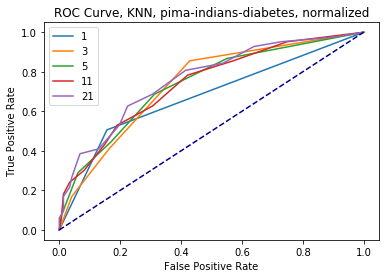

AUC
1 0.67
3 0.74
5 0.74
11 0.74
21 0.76


In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
def class_prob(model, test, normalize, k, distance):
    pred_class=[]
    prob_class=[]
    for index, row in test.iterrows():
        if normalize:
            row=model.normalizarDato(row.values)
        predicted=model.kneigbour_class(row, k, distance)
        pred_class.append(predicted)
        prob_class.append(model.kneigbour_class_prob(row, k, distance))
    return np.array([pred_class, prob_class])

class2=0
auc=[]  
for k in k_n:
    cl,p=class_prob(mod_kn, test, True, k, "euclidian")
    #Calculate prabability of class 1
    p=p.astype(np.float)
    ids_cl2=np.where(cl==class2)
    p[ids_cl2]=1-p[ids_cl2]
    fpr, tpr, thresholds = roc_curve(test_class_list.values, p)
    plt.plot(fpr, tpr, label=k)
    auc.append(roc_auc_score(test_class_list.values, p))

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, KNN, pima-indians-diabetes, normalized')
plt.legend()
plt.show()
print("AUC")
for k,a in zip(k_n,auc):
    print(k, round(a,2))

wdbc dataset

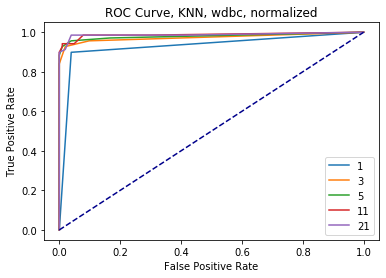

AUC
1 0.93
3 0.97
5 0.98
11 0.99
21 0.99


In [14]:
class2='B'
auc=[]  
for k in k_n:
    cl,p=class_prob(mod_kn1, test1, True, k, "euclidian")
    #Calculate prabability of class 1
    p=p.astype(np.float)
    ids_cl2=np.where(cl==class2)
    p[ids_cl2]=1-p[ids_cl2]
    fpr, tpr, thresholds = roc_curve(test_class_list1.values, p, pos_label='M')
    plt.plot(fpr, tpr, label=k)
    auc.append(roc_auc_score(test_class_list1.values, p))

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, KNN, wdbc, normalized')
plt.legend()
plt.show()
print("AUC")
for k,a in zip(k_n,auc):
    print(k, round(a,2))




__Curva ROC regresión logistica__

Clasificador de regresión logistica considera que clase 1 es el primero en la lista unica de clases, puede no coincidir con clase lógico original. En este ejemplo para pima-indians-diabetes se calcula la probabilidad de 0 y para wdbc para "B".

Dataset pima-indians-diabetes Class1: 0
Dataset wdbc Class1: B


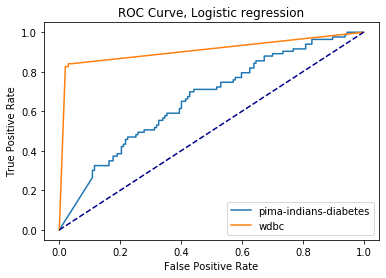

AUC, pima-indians-diabetes: 0.66
AUC, wdbc: 0.91


In [15]:
def class_prob_log(model, test):
    pred_class=[]
    prob_class=[]
    for index, row in test.iterrows():
        pred_class.append(model.classify(row))
        prob_class.append(model.probability(row))
    return np.array([pred_class, prob_class])

print("Dataset pima-indians-diabetes Class1:", model_rg.class1)
cl,p=class_prob_log(model_rg, test)
#Calculate prabability of class 1
p=1-p.astype(np.float)
fpr, tpr, thresholds = roc_curve(test_class_list.values, p, pos_label=1)
plt.plot(fpr, tpr, label="pima-indians-diabetes")

cl1,p1=class_prob_log(model_rg1, test1)
print("Dataset wdbc Class1:", model_rg1.class1)

#Calculate prabability of class 1
p1=1-p1.astype(np.float)

fpr1, tpr1, thresholds1 = roc_curve(test_class_list1.values,p1,pos_label='M')

plt.plot(fpr1, tpr1, label="wdbc")


plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve, Logistic regression')
plt.legend()
plt.show()
auc=roc_auc_score(test_class_list.values, p)
auc1=roc_auc_score(test_class_list1.values,p1)
print("AUC, pima-indians-diabetes:", round(auc,2))
print("AUC, wdbc:", round(auc1,2))

In [46]:
from Datos import *
import Clasificador

dataset_nb=Datos(filename)
cl_nb=Clasificador.ClasificadorNaiveBayes(True)
print(train)
cl_nb.entrenamiento(train.values,dataset_nb.nominalAtributos,dataset_nb.diccionario)
dataset_nb1=Datos(filename2)
cl_nb1=Clasificador.ClasificadorNaiveBayes(True)

     Pregs  Plas  Pres  Skin  Test  Mass   Pedi  Age
0        6   148    72    35     0  33.6  0.627   50
1        1    85    66    29     0  26.6  0.351   31
2        8   183    64     0     0  23.3  0.672   32
3        1    89    66    23    94  28.1  0.167   21
4        0   137    40    35   168  43.1  2.288   33
..     ...   ...   ...   ...   ...   ...    ...  ...
763     10   101    76    48   180  32.9  0.171   63
764      2   122    70    27     0  36.8  0.340   27
765      5   121    72    23   112  26.2  0.245   30
766      1   126    60     0     0  30.1  0.349   47
767      1    93    70    31     0  30.4  0.315   23

[538 rows x 8 columns]


In [45]:
def class_prob_nb(model, dataset,test):
    pred_class=[]
    prob_class=[]
    for index, row in test.iterrows():
        cl=model.clasifica(row, dataset.nominalAtributos, dataset.diccionario)
        p=model.probability(row, dataset.nominalAtributos, dataset.diccionario)
        pred_class.append(cl)
        prob_class.append(p)
    return np.array([pred_class, prob_class])
cl_nb,p_nb = class_prob_nb(cl_nb, dataset_nb, test)

cl_nb1,p_nb1 = class_prob_nb(cl_nb1, dataset_nb1, test1)


class2=0
ids_clnb=np.where(cl==class2)
p_nb[ids_clnb]=1-p[ids_clnb]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_class_list.values, p_nb, pos_label=1)
plt.plot(fpr_nb, tpr_nb, label="pima-indians-diabetes")


C:\Users\quaxoc\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1721: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\quaxoc\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
C:\Users\quaxoc\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
C:\Users\quaxoc\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)


AttributeError: 'ClasificadorNaiveBayes' object has no attribute 'probability'